In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Einlesen der Messwerte
data = np.genfromtxt("./Data_LJ.txt",comments='#')

# Sortieren der Messwerte
constT_1 = data[0:10,:]       # Messreihe T = 1.4, rho variabel
constT_2 = data[80:90,:]      # Messreihe T = 6.0, rho variabel


constRho_1 = np.zeros((9,4))  # Messreihe rho = 0.1, T variabel
constRho_2 = np.zeros((9,4))  # Messreihe rho = 1.0, T variabel
for i in range(9):
    for j in range(4):
        constRho_1[i,j] = data[i*10,j]
        constRho_2[i,j] = data[i*10+9,j]
        
"""
Aufbau dieser Datensätze:
0. Spalte = Dichte (rho)
1. Spalte = Temperatur (T)
2. Spalte = Druck (p)
3. Spalte = Innere Energie (U)
"""
print ("Beispielmessreihe mit konstantem T:")
print ("  rho       T       p       U")
print (constT_1)
plt.scatter(constT_1[:,0],constT_1[:,2], label='p(rho; T = 1.4)')
plt.scatter(constT_1[:,0],constT_1[:,3], label='U(rho; T = 1.4)')
plt.xlabel("$\\varrho$")
plt.legend()
plt.show()

print ("Beispielmessreihe mit konstantem rho:")
print ("  rho       T       p       U")
print (constRho_1)
plt.scatter(constRho_1[:,1],constRho_1[:,2], label='p(rho = 0.1; T)')
plt.scatter(constRho_1[:,1],constRho_1[:,3], label='U(rho = 0.1; T)')
plt.xlabel("$T$")
plt.legend()
plt.show()


Beispielmessreihe mit konstantem T:
  rho       T       p       U
[[ 0.1     1.4     0.1035 -0.766 ]
 [ 0.2     1.4     0.1524 -1.483 ]
 [ 0.3     1.4     0.172  -2.136 ]
 [ 0.4     1.4     0.196  -2.74  ]
 [ 0.5     1.4     0.281  -3.366 ]
 [ 0.6     1.4     0.565  -4.006 ]
 [ 0.7     1.4     1.292  -4.637 ]
 [ 0.8     1.4     2.856  -5.199 ]
 [ 0.9     1.4     5.795  -5.612 ]
 [ 1.      1.4    10.86   -5.778 ]]


<Figure size 640x480 with 1 Axes>

Beispielmessreihe mit konstantem rho:
  rho       T       p       U
[[ 0.1     1.4     0.1035 -0.766 ]
 [ 0.1     1.6     0.1288 -0.717 ]
 [ 0.1     1.8     0.1538 -0.683 ]
 [ 0.1     2.      0.1776 -0.669 ]
 [ 0.1     2.5     0.2383 -0.625 ]
 [ 0.1     3.      0.2984 -0.592 ]
 [ 0.1     4.      0.4154 -0.547 ]
 [ 0.1     5.      0.5324 -0.51  ]
 [ 0.1     6.      0.6499 -0.478 ]]


<Figure size 640x480 with 1 Axes>

In [2]:
# Datensatzlänge
length_rho = 10
length_T = 9
# Ab hier beginnt die Umsetzung des Verfahrens aus Aufgabenteil a).
# Als Hinweis geben wir Ihnen eine sinnvolle Bezeichnung der zu berechnenden Groessen an:
mu_div_T_1 = np.zeros(length_T-1)  # bei festem rho = 0.1
mu_div_T_2 = np.zeros(length_T-1)  # bei festem rho = 1.0
mu_1 = np.zeros(length_rho-1)        # bei festem T = 1.4
mu_2 = np.zeros(length_rho-1)        # bei festem T = 6.0

In [14]:
# Numerische Integration (in for-Schleife)
def integrateT(bruh,f):
    s=0
    for i in range(length_T-1):
        dx=bruh[i+1,1]-bruh[i,1]
        s += (-1*bruh[i,3]*(1 / (bruh[i,1]**2)))*dx+(1 / (bruh[i,1]**2))*dx
        f[i]=s
    return s
#Creating a table for each measument with constant rho for different rhos
def constrho(n):
    dat = np.zeros((9,4))
    for i in range(9):
        for j in range(4):
            dat[i,j] = data[i*10+n,j]
    return dat

#Making a table for the different integration values for different rhos
val=[]
for y in range(length_rho):
    val.append(integrateT(constrho(y),mu_div_T_1))


[1.090834984410431, 1.5063306571239607, 1.9006089351851856, 2.287006395345175, 2.667460636180398, 3.034730647518267, 3.366061851694381, 3.6235983120748303, 3.7575046337238605, 3.711700160777274]


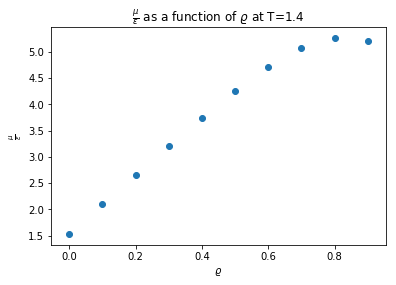

In [16]:
# Grafische Darstellung
print(val)
val14=[]
for i in val:
    val14.append(i*1.4)

#as a function of rho
plt.scatter(np.arange(0,1,0.1),val14)
plt.xlabel("$\\varrho$")
plt.ylabel("$\\frac{\\mu}{\\epsilon}$")
plt.title("$\\frac{\\mu}{\\epsilon}$ as a function of $\\varrho$ at T=1.4")
plt.show()
#as a function of the integration step
#plt.scatter(range(length_T-1),mu_div_T_1)
#plt.scatter(range(length_T-1),mu_div_T_2)
#plt.show()
#mu_1=mu_div_T_1*1.4
#mu_2=mu_div_T_2*6
#plt.scatter(range(length_T-1),mu_1)
#plt.scatter(range(length_T-1),mu_2)
#plt.show()
